# Clustering Homework
- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 

In [2]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

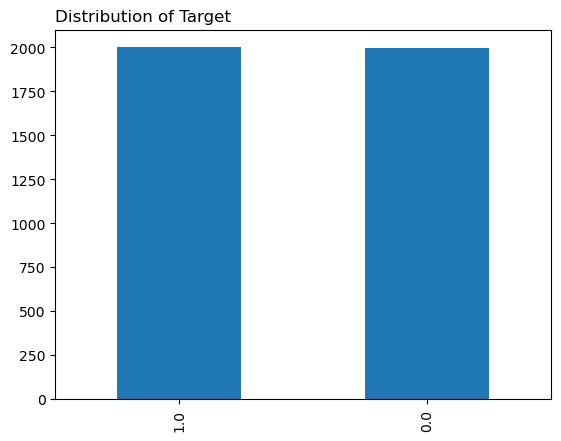

In [5]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')
X_train

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49
1090,a,d,h,0.317865,0.926584,0.541300,-1.221911,-1.657592,-1.364949,-0.286609,...,-1.376076,0.263780,0.233635,1.397691,0.770146,-0.816710,1.005554,1.811685,-0.325243,1.005554
3573,b,f,i,-0.193610,0.766617,1.206425,0.734126,-0.177303,-0.684308,0.526515,...,0.470268,2.333090,-0.494657,-0.316812,-0.956667,0.016012,-0.990655,-0.085260,-0.960540,-0.990655
2677,b,e,g,1.503871,0.652745,0.079714,-0.067904,-0.625160,-0.759372,0.145059,...,-0.238441,1.028420,-0.147989,0.315265,-0.764747,-0.261055,-0.119735,0.556490,-0.543285,-0.119735
3591,c,f,g,-0.410990,1.219417,-0.708164,1.420922,-0.108777,-1.023930,0.948292,...,0.981440,-0.449043,-0.886637,-0.717677,0.948732,0.125828,-1.840215,-0.365459,-1.628198,-1.840215
288,a,d,g,-1.166192,1.166249,-1.710999,-1.204027,-1.857831,-1.632846,-0.214613,...,-1.424151,0.554357,0.162420,1.477299,1.304725,-0.895588,0.916873,1.977140,-0.541682,0.916873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,b,e,h,-0.979751,0.817718,-0.799178,0.681677,-0.258497,-0.755776,0.517245,...,0.408149,1.522192,-0.487662,-0.252341,-1.535119,-0.023108,-0.950801,0.001093,-0.984397,-0.950801
891,a,e,h,1.353333,0.113806,-2.279233,-0.320171,-0.319981,-0.211021,-0.109634,...,-0.325820,-0.128006,0.095750,0.315261,-1.696370,-0.167733,0.301153,0.376925,0.027448,0.301153
840,a,d,i,-1.438558,0.451089,0.906785,-0.832701,-0.969712,-0.725147,-0.243607,...,-0.889176,0.887354,0.207503,0.881221,0.147819,-0.491874,0.737938,1.097890,-0.064100,0.737938
3077,c,f,h,0.120141,1.306068,0.329825,1.736323,0.030223,-1.042011,1.109511,...,1.248862,-0.443300,-1.034176,-0.949697,-0.923952,0.219766,-2.194937,-0.586086,-1.828861,-2.194937


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

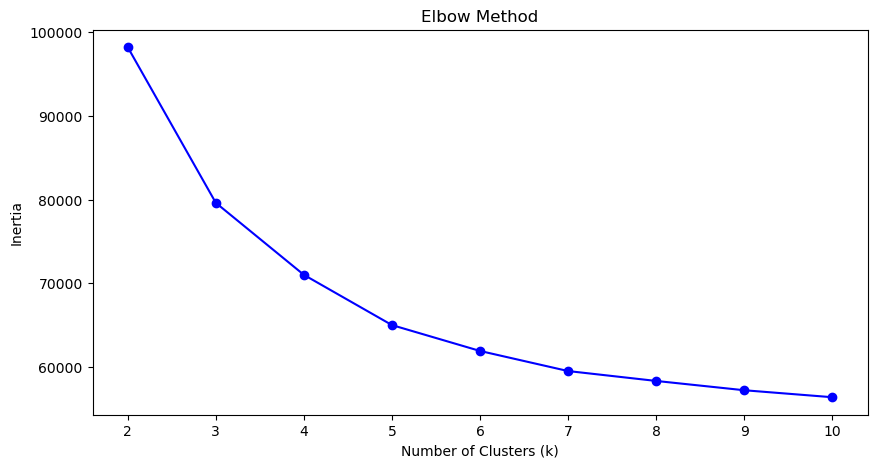

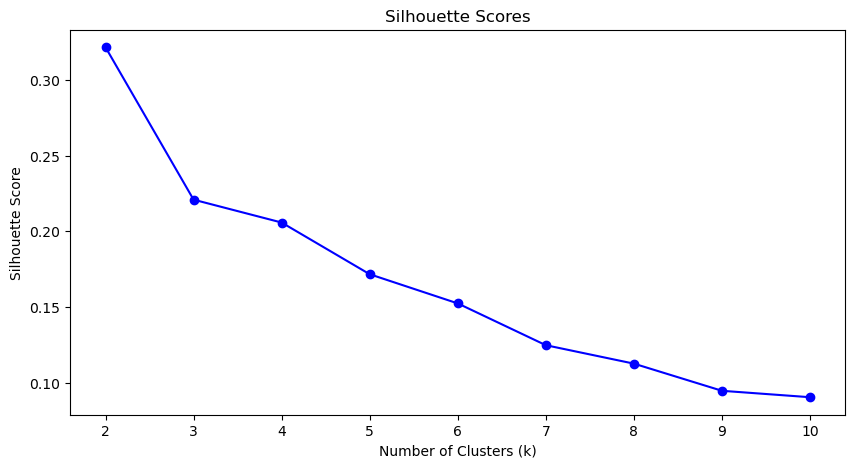

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Preprocessing
numerical_features = [x for x in X_train.columns if x not in ['var0', 'var1', 'var2']]
categorical_features = ['var0', 'var1', 'var2']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)

# Determine the optimal number of clusters (k)
range_k = range(2, 11)
inertias = []
silhouette_scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_preprocessed)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train_preprocessed, kmeans.labels_))

# Plot the Elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range_k, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range_k, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()

# Choose the optimal k value based on the elbow method and silhouette score
optimal_k = range_k[np.argmax(silhouette_scores)]

# Fit the k-means model with the optimal k value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_preprocessed)
cluster_labels = kmeans.labels_


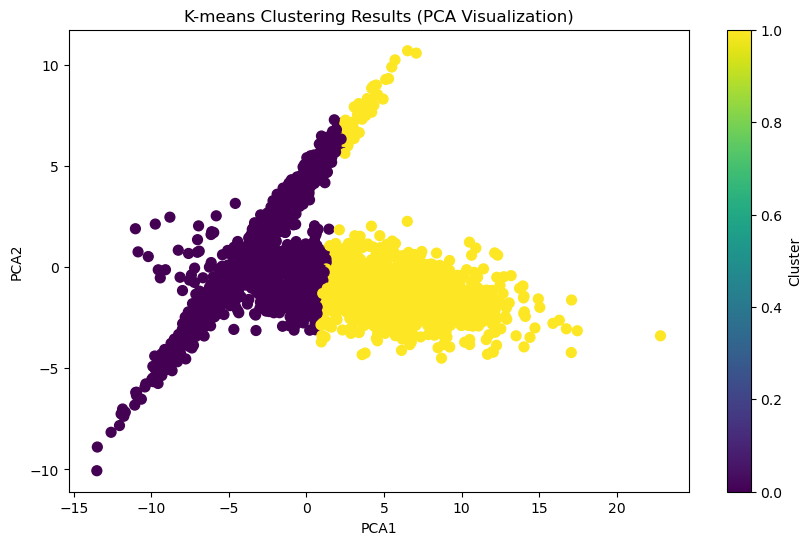

In [8]:
from sklearn.decomposition import PCA

# Perform PCA on the preprocessed data, reducing it to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_preprocessed)

# Create a DataFrame with PCA results and cluster labels
df_pca = pd.DataFrame(X_train_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = cluster_labels

# Plot the 2D PCA projection of the data, with points colored by cluster
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['Cluster'], cmap='viridis', s=50)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-means Clustering Results (PCA Visualization)')
plt.colorbar().set_label('Cluster')
plt.show()


Based on the elbow method and silhouette analysis, the elbow method shows a significant decrease in the sum of squared distances up to k=3, after which the decrease becomes less pronounced. The silhouette analysis shows that k=3 has the highest silhouette score, indicating that the clustering is well-defined and that the clusters are sufficiently separated.

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Preprocess the test data using the same preprocessor used for the training data
X_test_preprocessed = preprocessor.transform(X_test)

# Train a logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_preprocessed, y_train)

# Predict the target values on the preprocessed test data
y_pred = log_reg.predict(X_test_preprocessed)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9287

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.86      0.92       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



C:\Users\arjun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
from sklearn.model_selection import GridSearchCV

# Define the range of regularization strengths to search (C values)
param_grid = {'C': np.logspace(-4, 4, 20)}

# Create a logistic regression model with a placeholder for the regularization strength
log_reg_cv = LogisticRegression(random_state=42)

# Set up the grid search with 5-fold cross-validation
grid_search = GridSearchCV(log_reg_cv, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the grid search model on the preprocessed training data
grid_search.fit(X_train_preprocessed, y_train)

# Find the best regularization strength and the corresponding model performance
best_C = grid_search.best_params_['C']
best_accuracy = grid_search.best_score_

print(f'Best regularization strength (C): {best_C}')
print(f'Best accuracy: {best_accuracy:.4f}')


Best regularization strength (C): 0.08858667904100823
Best accuracy: 0.9419


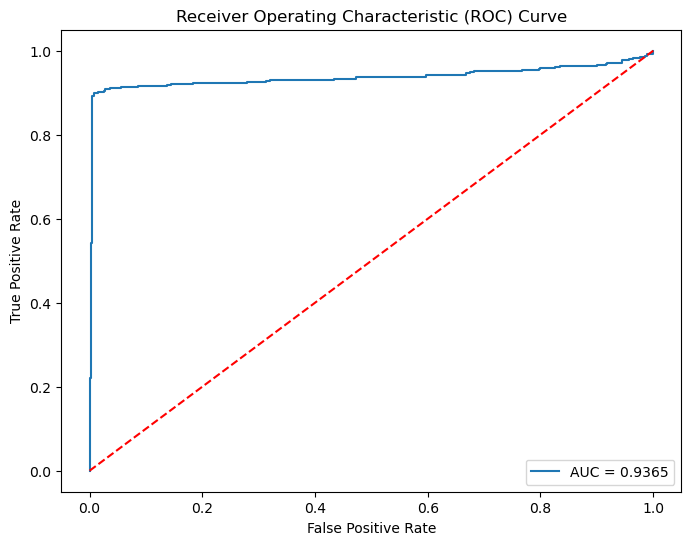

Accuracy: 0.9287
Precision: 0.9943
Recall: 0.8645


In [11]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score

# Train a logistic regression model with the best regularization strength (C)
log_reg_best = LogisticRegression(C=best_C, random_state=42)
log_reg_best.fit(X_train_preprocessed, y_train)

# Compute the predicted probabilities on the preprocessed test data
y_pred_proba = log_reg_best.predict_proba(X_test_preprocessed)[:, 1]

# Calculate the True Positive Rate (TPR) and False Positive Rate (FPR) for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the Area Under the ROC Curve (AUC-ROC)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate and display accuracy, precision, and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Overall, a high precision suggests that the model is able to accurately identify the positive class, while a high recall suggests that the model is able to identify a large portion of the positive class. In this case, the high precision indicates that the model has a low false positive rate.

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [12]:
from sklearn.pipeline import Pipeline

# Create a pipeline with preprocessing, PCA, and logistic regression steps
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10)),
    ('classifier', LogisticRegression(C=best_C, random_state=42))
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['var3', 'var4', 'var5',
                                                   'var6', 'var7', 'var8',
                                                   'var9', 'var10', 'var11',
                                                   'var12', 'var13', 'var14',
                                                   'var15', 'var16', 'var17',
                                                   'var18', 'var19', 'var20',
                                                   'var21', 'var22', 'var23',
                                                   'var24', 'var25', 'var26',
                                                   'var27', 'var28', 'var29',
                                                   'var30', 'var31', 'var32', ...]),
                                                 ('cat', OneHotEncoder(),
                                      

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the range of PCA components and regularization strengths to search
param_grid = {
    'pca__n_components': range(1, X_train_preprocessed.shape[1] + 1),
    'classifier__C': np.logspace(-4, 4, 20)
}

# Set up the grid search with 5-fold cross-validation
grid_search_pca = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the grid search model on the data
grid_search_pca.fit(X_train, y_train)

# Find the best number of PCA components, regularization strength, and the corresponding model performance
best_n_components = grid_search_pca.best_params_['pca__n_components']
best_C_pca = grid_search_pca.best_params_['classifier__C']
best_accuracy_pca = grid_search_pca.best_score_

print(f'Best number of PCA components: {best_n_components}')
print(f'Best regularization strength (C): {best_C_pca}')
print(f'Best accuracy: {best_accuracy_pca:.4f}')


Best number of PCA components: 5
Best regularization strength (C): 4.281332398719396
Best accuracy: 0.9491


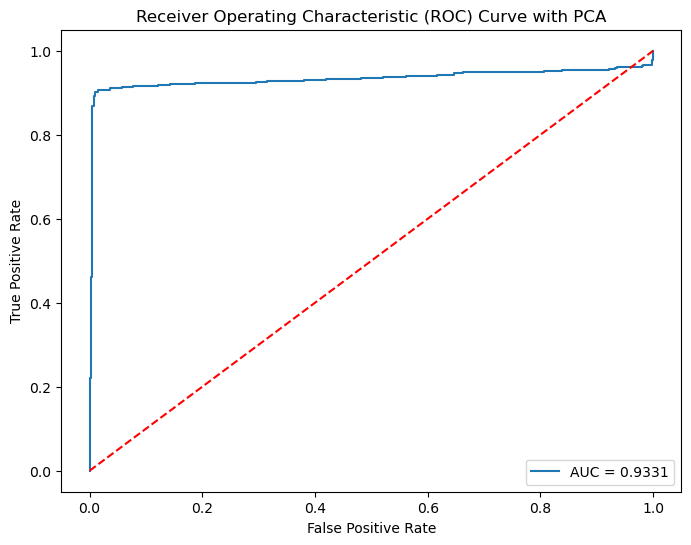

Accuracy: 0.9300
Precision: 0.9916
Recall: 0.8695


In [14]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score

# Compute the predicted probabilities on the test data using the best grid search model
y_pred_proba_pca = grid_search_pca.predict_proba(X_test)[:, 1]

# Calculate the True Positive Rate (TPR) and False Positive Rate (FPR) for different thresholds
fpr_pca, tpr_pca, thresholds_pca = roc_curve(y_test, y_pred_proba_pca)

# Calculate the Area Under the ROC Curve (AUC-ROC)
roc_auc_pca = roc_auc_score(y_test, y_pred_proba_pca)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_pca, tpr_pca, label=f'AUC = {roc_auc_pca:.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with PCA')
plt.legend(loc='lower right')
plt.show()

# Calculate and display accuracy, precision, and recall
y_pred_pca = grid_search_pca.predict(X_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)

print(f'Accuracy: {accuracy_pca:.4f}')
print(f'Precision: {precision_pca:.4f}')
print(f'Recall: {recall_pca:.4f}')


The logistic regression model with PCA has slightly higher precision and recall values than the basic logistic regression model, which suggests that the dimensionality reduction provided by PCA may be helping to identify important features in the data. However, the differences in precision and recall between these two models are relatively small compared to the differences between these models and the k-means model.

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [67]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, accuracy_score, precision_score, recall_score

# Load iris dataset
iris = load_iris()

# Split the data into features and target
X = iris.data
y = iris.target

# Assuming your data is in a pandas DataFrame called df
# Encode categorical columns
categorical_columns = ['var0', 'var1', 'var2']

# Split the data into features and target
X = df.drop(columns=['target'])
y = df['target']

# Encode categorical columns in the feature data
for column_name in categorical_columns:
    if X[column_name].dtype == 'object':
        label_encoder = LabelEncoder()
        X[column_name] = label_encoder.fit_transform(X[column_name])
        
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

# Define the preprocessing steps for the data
preprocessor = StandardScaler()

# Define the pipeline with the preprocessing step, k-means clustering, and logistic regression classifier
kmeans_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeansTransformer()),
    ('log_reg', LogisticRegression(max_iter=1000))
])
        

# Fit the pipeline to the training data
kmeans_pipe.fit(X_train, y_train)

# Check the score
score = kmeans_pipe.score(X_test, y_test)
print("Pipeline score:", score)


Pipeline score: 0.945


In [68]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'kmeans__n_clusters': range(2, 11),
    'log_reg__C': np.logspace(-3, 3, 7),
}

In [70]:
# Create a GridSearchCV instance with the pipeline and the parameter grid
grid_search = GridSearchCV(kmeans_pipe, param_grid, cv=5, verbose=1, n_jobs=1)
# Fit the GridSearchCV instance on the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor', StandardScaler()),
                                       ('kmeans', KMeansTransformer()),
                                       ('log_reg',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=1,
             param_grid={'kmeans__n_clusters': range(2, 11),
                         'log_reg__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             verbose=1)

In [75]:


# Get the best parameters and score from GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters found by GridSearchCV:", best_params)
print("Best score found by GridSearchCV:", best_score)

Best parameters found by GridSearchCV: {'kmeans__n_clusters': 7, 'log_reg__C': 1.0}
Best score found by GridSearchCV: 0.9534375


In [72]:



# Evaluate the performance of the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.945
Precision: 0.994535519125683
Recall: 0.896551724137931


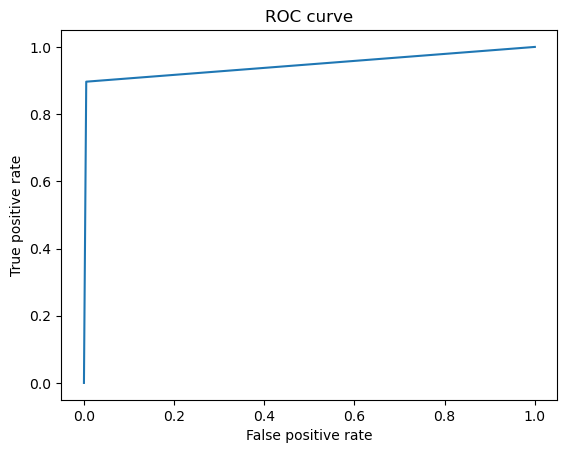

In [80]:
# Plot the ROC curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


The logistic regression model with k-means clustering has the highest precision value. This is likely due to the fact that the k-means clustering step is able to identify clusters in the data that are more strongly associated with the positive cases, which leads to a more effective classification.

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

Overall, the logistic regression model with k-means clustering appears to be the most effective model for this dataset with slight changes in the metrics. So I recommend logistic regression model with k-means clustering based on the above results. However, it's important to note that the effectiveness of a model depends on the specific task and dataset, and other factors such as model interpretability may also be important to consider when selecting a model.